In [214]:
def save_dete_tafe(df1,df2,filename):
    df1.to_csv('DETE'+filename+'_backup.csv')
    df2.to_csv('TAFE'+filename+'_backup.csv')

# Employee Exit Survey

## Aims of Analysis
Stakeholders have asked for answers to these questions:

Period of Service
- Are short serving employees resigning due to dissatisfaction? 
- Are long serving employees resigning due to dissatisfaction? 

Age of Employee
- Are younger employees resigning due to dissatisfaction?
- Are older employees resigning due to dissatisfaction?

## Data
Two data sets will be used:

#### [TAFE employee exit survey](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)
Staff feedback provides the Department with valuable information on the reasons why
employees resign or retire. The information is used to inform attraction and retention initiatives
and to improve work practices across the Department to ensure the Department is considered
an employer of choice.

The TAFE Exit Survey was developed to effectively canvass the opinions and attitudes of
departing employees to identify a wide range of operational, organisational and personal
variables affecting the decision to leave. 
#### [Employee Exit Survey - DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
Staff feedback provides the Department with valuable information on the reasons why
employees resign or retire. The information is used to inform attraction and retention initiatives
and to improve work practices across the Department to ensure the Department is considered
an employer of choice.

The DETE Exit Survey was developed to effectively canvass the opinions and attitudes of
departing employees to identify a wide range of operational, organisational and personal
variables affecting the decision to leave

## Summary of Results
1. Short service
2. Long service
3. Young
4. Older

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dete = pd.read_csv('dete_survey_2014.csv', encoding='cp1252', na_values='Not Stated')
tafe = pd.read_csv('tafe_survey_2013.csv', encoding='cp1252')

# Investigate the Dataset

## DETE Dataset

### Findings

The DETE dataset has the following basic characteristics:

#### Types
- A mix of data, some of which is useful to **dissatisfaction** and some which is not. We can drop the latter columns without any consequence.
- Likert values in order of frequency: A, SA, N, D, SD, M
    - From the TAFE dataset we know that these stand for:
        - SA = Strongly Agree
        - A  = Agree
        - N  = Neutral
        - D  = Disagree
        - SD = Strongly Disagree
        - M  = Not Applicable
- Years only in date columns
- Boolean columns for key dissatisfaction data.
    
#### Completeness
- Columns which are nearly entirely empty and therefore can be dropped:
    - 51  Aboriginal                           16 non-null     object
    - 52  Torres Strait                        3 non-null      object
    - 53  South Sea                            7 non-null      object
    - 54  Disability                           23 non-null     object
    - 55  NESB                                 32 non-null     object
- Columns 50% to 80% empty which can perhaps be easily filled, or dropped - though this would mean losing correlations to managers:
    - 6   Classification                       455 non-null    object
    - 8   Business Unit                        126 non-null    object
- Columns 90% full which can be filled with mean or mode values depending on what they are.

In [3]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

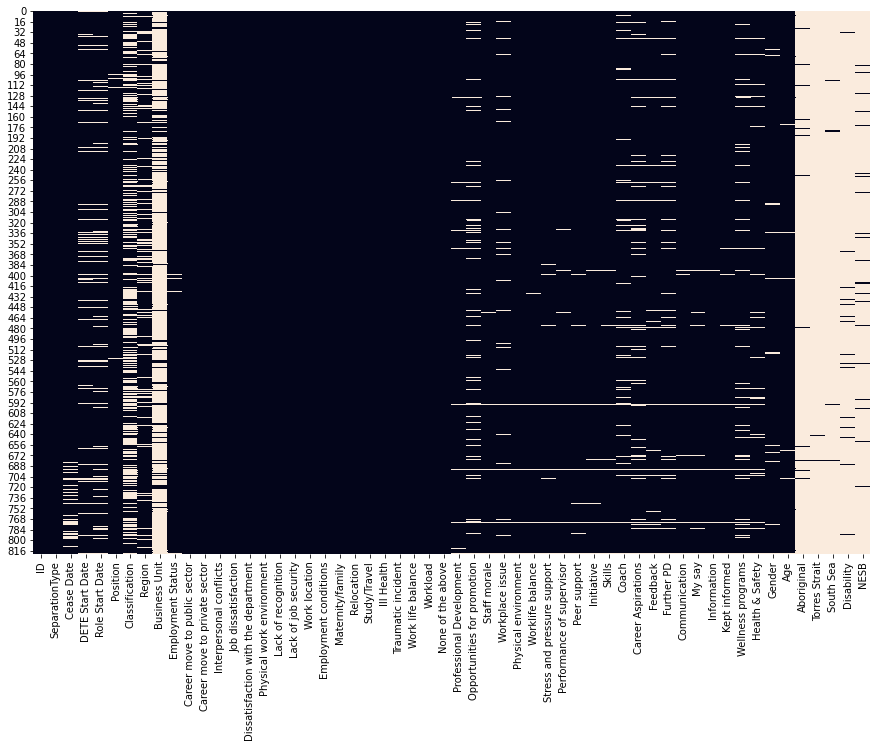

In [4]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(dete.isnull(), cbar=False)
plt.show()

In [5]:
dete['Professional Development'].value_counts()

A     413
SA    184
N     103
D      60
SD     33
M      15
Name: Professional Development, dtype: int64

In [6]:
dete['Aboriginal'].value_counts()

Yes    16
Name: Aboriginal, dtype: int64

In [7]:
dete['DETE Start Date'].loc[10:30]

10    1999.0
11    2009.0
12    1998.0
13    1967.0
14    2007.0
15    1995.0
16       NaN
17    1996.0
18    2006.0
19    1989.0
20    1982.0
21    1980.0
22    1997.0
23    1973.0
24    1981.0
25    1995.0
26    1974.0
27    2005.0
28    1989.0
29    1975.0
30    1989.0
Name: DETE Start Date, dtype: float64

In [8]:
dete['SeparationType'].loc[10:30]

10                          Age Retirement
11    Resignation-Move overseas/interstate
12               Resignation-Other reasons
13                          Age Retirement
14              Resignation-Other employer
15        Voluntary Early Retirement (VER)
16               Resignation-Other reasons
17                          Age Retirement
18                          Age Retirement
19                          Age Retirement
20              Resignation-Other employer
21               Resignation-Other reasons
22               Resignation-Other reasons
23               Resignation-Other reasons
24                          Age Retirement
25               Resignation-Other reasons
26                          Age Retirement
27              Resignation-Other employer
28                          Age Retirement
29                          Age Retirement
30                          Age Retirement
Name: SeparationType, dtype: object

In [9]:
dete['Skills'].loc[10:30]

10     A
11     N
12    SA
13     A
14    SA
15     A
16     A
17     A
18     A
19     A
20     N
21    SA
22     A
23     D
24    SA
25     N
26     A
27     A
28    SA
29     A
30     A
Name: Skills, dtype: object

In [10]:
dete.iloc[10:30, 10:15]

,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department
10,False,False,False,True,False
11,False,False,False,False,False
12,False,False,False,False,False
13,False,False,False,False,False
14,False,False,False,True,True
15,False,False,False,False,False
16,False,False,False,False,False
17,False,False,False,False,False
18,False,False,False,False,False
19,False,False,False,False,False


## TAFE Dataset

### Findings

The TAFE dataset has the following general characteristics:

#### Types
- Detailed questions which help us fill in some gaps from the DETE set.
- A range of columns, some of which are relevant to **dissatisfaction** while some others can be dropped.
- Likert values for views on the institute and work unit views.
    - SA = Strongly Agree
    - A  = Agree
    - N  = Neutral
    - D  = Disagree
    - SD = Strongly Disagree
    - M  = Not Applicable
- Years only in date columns
- Boolean columns for key dissatisfaction data.

#### Completeness
- 50% (approx) null values for some columns where 2 are of particular value. Imputation challenging with only 50% return, but not impossible depending on the distribution.
    - Contributing Factors. Career Move - Public Sector
    - Contributing Factors. Career Move - Private Sector
    - Contributing Factors. Career Move - Self-employment
    - Contributing Factors. Ill Health
    - Contributing Factors. Maternity/Family
    - Contributing Factors. **Dissatisfaction**
    - Contributing Factors. **Job Dissatisfaction**
    - Contributing Factors. Interpersonal Conflict
    - Contributing Factors. Study
    - Contributing Factors. Travel
    - Contributing Factors. Other
    - Contributing Factors. NONE
- 60% to 80% null values for the majority of the rest of the columns.
- 40% (approx) of rows are nearly 100% null


In [11]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

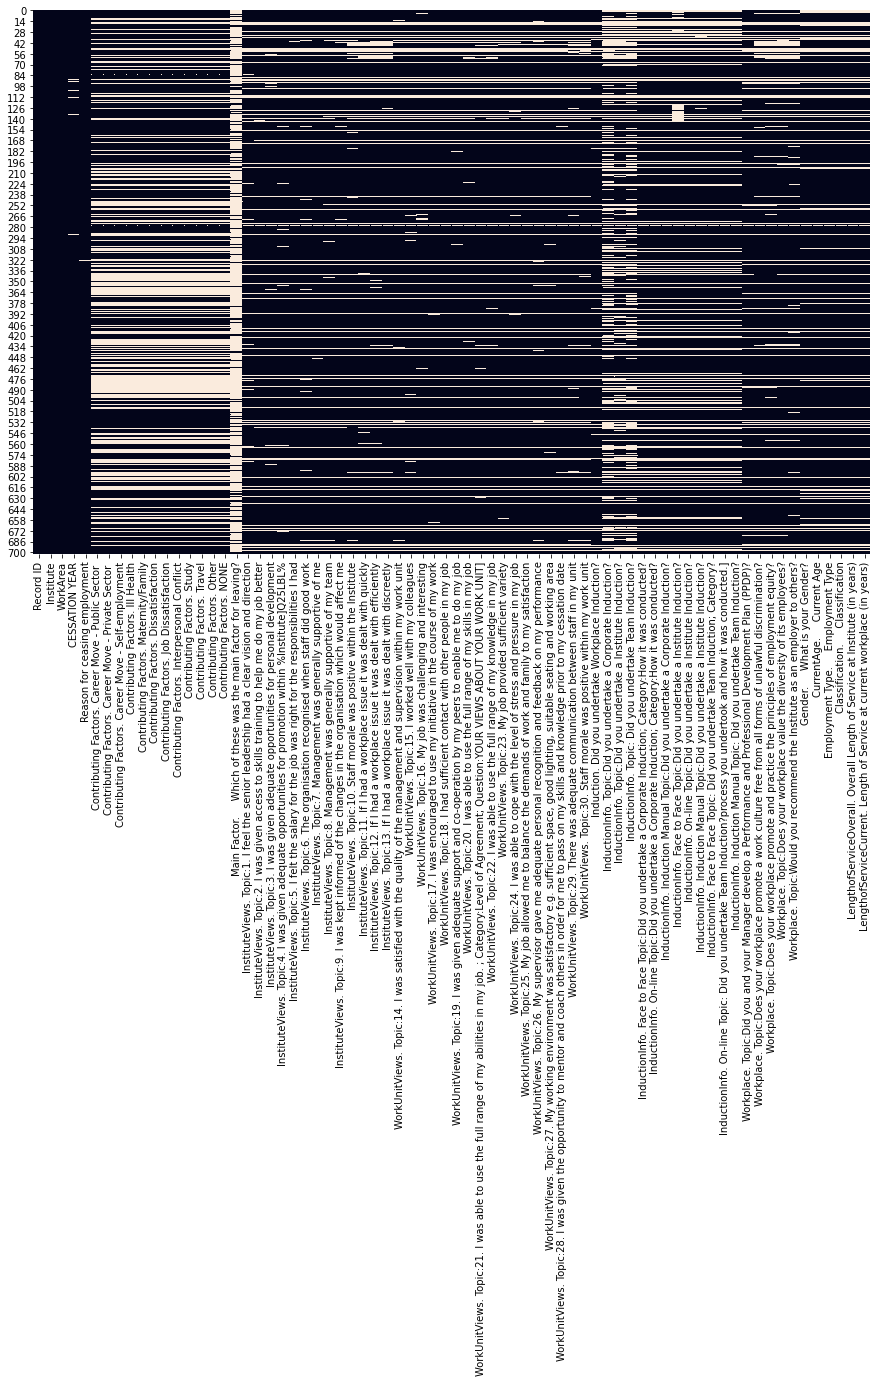

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(tafe.isnull(), cbar=False)
plt.show()

In [13]:
tafe.iloc[10:30, [5,10,11]]

,Contributing Factors. Career Move - Public Sector,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
10,Career Move - Public Sector,-,-
11,NaN,NaN,NaN
12,NaN,NaN,NaN
13,-,-,-
14,-,Contributing Factors. Dissatisfaction,Job Dissatisfaction
15,-,-,-
16,NaN,NaN,NaN
17,Career Move - Public Sector,-,Job Dissatisfaction
18,NaN,NaN,NaN
19,-,-,-


In [14]:
tafe['InstituteViews. Topic:6. The organisation recognised when staff did good work'].value_counts()

Agree                212
Neutral              136
Disagree             105
Strongly Agree        74
Strongly Disagree     73
Not Applicable         7
Name: InstituteViews. Topic:6. The organisation recognised when staff did good work, dtype: int64

In [15]:
tafe['Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?'].value_counts()

Yes    536
No      58
Name: Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?, dtype: int64

# Tidy DETE Set

## Priorities
1. Drop columns we don't need: there are lots.
2. Clean columns we do need.
3. Perform imputation on missing values
4. Delete rows we don't need.

In [28]:
# DETE Drop List
# 18:20
# 21:23
# 24
# 28:49
# 51:
#dete = dete.drop(dete.columns[51:], axis=1)
#dete = dete.drop(dete.columns[28:49], axis=1)
#dete = dete.drop(dete.columns[24], axis=1)
#dete = dete.drop(dete.columns[21:23], axis=1)
#dete = dete.drop(dete.columns[18:20], axis=1)
#dete = dete.drop(dete.columns[3], axis=1)
#dete = dete.drop(dete.columns[6:8], axis=1)
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   Role Start Date                      724 non-null    float64
 4   Position                             817 non-null    object 
 5   Classification                       455 non-null    object 
 6   Employment Status                    817 non-null    object 
 7   Career move to public sector         822 non-null    bool   
 8   Career move to private sector        822 non-null    bool   
 9   Interpersonal conflicts              822 non-null    bool   
 10  Job dissatisfaction                  822 non-null    bool   
 11  Dissatisfaction with the departm

In [91]:
# Backup / Restore df.dete
#dete.to_csv('dete_backup_2021_12_1439.csv')
#dete = pd.read_csv('dete_backup_2021_12_1439')

In [104]:
# Calculate a length of service column and delete Role Start Date to match TAFE dataset.
pattern = r"(?P<year>[1-2][0-9][0-9][0-9])"
stop_years = dete['Cease Date'].str.extractall(pattern)
dete['stop_year'] = stop_years['year'].loc[:,0]
dete['service_length'] = dete['stop_year'].astype('float') - dete['Role Start Date']

In [125]:
# Drop working column
#dete = dete.drop(dete.columns[23], axis=1)

# Drop unwanted columns
#dete = dete.drop(dete.columns[4], axis=1)
#dete = dete.drop(dete.columns[0], axis=1)
#dete = dete.drop(dete.columns[5], axis=1)

dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   Position                             817 non-null    object 
 4   Classification                       455 non-null    object 
 5   Career move to public sector         822 non-null    bool   
 6   Career move to private sector        822 non-null    bool   
 7   Interpersonal conflicts              822 non-null    bool   
 8   Job dissatisfaction                  822 non-null    bool   
 9   Dissatisfaction with the department  822 non-null    bool   
 10  Physical work environment            822 non-null    bool   
 11  Lack of recognition             

In [126]:
# Backup / Restore df.dete
#dete.to_csv('dete_backup_2021_12_1524.csv')
#dete = pd.read_csv('dete_backup_2021_12_1439')

In [122]:
# TAFE Drop List to Match DETE
# 1
# 7
# 13:15
# 16:23
# 24:26
# 27:41
# 43
# 45:66
# 69
# 71:
#tafe = tafe.drop(tafe.columns[1], axis=1)

In [127]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 21 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                    --------------  -----  
 0   Record ID                                                                                                                                 702 non-null    int64  
 1   WorkArea                                                                                                                                  702 non-null    object 
 2   CESSATION YEAR                                                                                                                            695 non-null    float64
 3   Reason for ceasing employment                          

In [128]:
# Backup / Restore df.dete
#tafe.to_csv('tafe_backup_2021_12_1524.csv')
#dete = pd.read_csv('dete_backup_2021_12_1439')

In [130]:
# Rename the columns
dete_col = [
'record_id',
'leave_reason',
'leave_year',
'job_position',
'job_status',
'cf_to_public_sector',
'cf_to_private_sector',
'cf_interpersonal_conflict',
'cf_job_dissatisfaction',
'cf_dept_dissatisfaction',
'dept_work_environment',
'institute_recognition',
'institute_job_security',
'cf_family',
'cf_health',
'dept_work_life_balance',
'dept_workload',
'cf_other',
'gender',
'age',
'service_years'
]

tafe_col = [
'record_id',
'job_position',
'leave_year',
'leave_reason',
'cf_to_public_sector',
'cf_to_private_sector',
'cf_health',
'cf_family',
'cf_dept_dissatisfaction',
'cf_job_dissatisfaction',
'cf_interpersonal_conflict',
'cf_other',
'institute_recognition',
'institute_job_security',
'dept_workload',
'dept_work_life_balance',
'dept_work_environment',
'gender',
'age',
'job_status',
'service_years'
]

dete.columns = dete_col
tafe.columns = tafe_col

In [173]:
dete = dete[tafe.columns]

print(dete.info())
print(tafe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   record_id                  822 non-null    int64  
 1   job_position               817 non-null    object 
 2   leave_year                 788 non-null    object 
 3   leave_reason               822 non-null    object 
 4   cf_to_public_sector        822 non-null    bool   
 5   cf_to_private_sector       822 non-null    bool   
 6   cf_health                  822 non-null    bool   
 7   cf_family                  822 non-null    bool   
 8   cf_dept_dissatisfaction    822 non-null    bool   
 9   cf_job_dissatisfaction     822 non-null    bool   
 10  cf_interpersonal_conflict  822 non-null    bool   
 11  cf_other                   822 non-null    bool   
 12  institute_recognition      822 non-null    bool   
 13  institute_job_security     822 non-null    bool   

In [174]:
# Backup / Restore DataFrames
# tafe.to_csv('tafe_backup_2021_12_1527_resized_and_matched.csv')
# dete.to_csv('dete_backup_2021_12_1527_resized_and_matched.csv')
# tafe21 = pd.read_csv('tafe_backup_2021_12_1527_resized_and_matched.csv')
# dete21 = pd.read_csv('dete_backup_2021_12_1527_resized_and_matched.csv')

# Transform DETE and TAFE column contents to match each other

In [146]:
# DETE: Reduce 'job_position' down to teaching / non-teaching
teaching_roles = [
'Teacher',
'Teacher Aide',
'Head of Curriculum/Head of Special Education',
'Guidance Officer',
'School Principal',
'Deputy Principal']

non_teaching_roles = [
'Public Servant',
'Cleaner',
'Schools Officer',
'School Administrative Staff',
'Technical Officer',
'Other',
'Professional Officer',
'School Based Professional Staff (Therapist, nurse, etc)',
'Business Service Manager']

In [185]:
# Logic
# If 'job_position' in teaching_roles set item to 'teaching_role'

def set_role(role):
    if role in teaching_roles:
        return 'teaching_role'
    elif role in non_teaching_roles:
        return 'non_teaching_role'
    else:
        return 'NaN'

dete21['job_position'] = dete21['job_position'].apply(set_role)

dete21['job_position'].value_counts(dropna=False)

teaching_role        520
non_teaching_role    297
NaN                    5
Name: job_position, dtype: int64

In [197]:
for col in dete20.columns:
    print('DETE Column Name:', col)
    print(dete20[col].value_counts())
    print('\n')

for col in tafe20.columns:
    print('TAFE Column Name:', col)
    print(tafe20[col].value_counts())
    print('\n')

DETE Column Name: record_id
1      1
553    1
543    1
544    1
545    1
      ..
277    1
278    1
279    1
280    1
823    1
Name: record_id, Length: 822, dtype: int64


DETE Column Name: job_position
teaching_role        520
non_teaching_role    297
NaN                    5
Name: job_position, dtype: int64


DETE Column Name: leave_reason
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: leave_reason, dtype: int64


DETE Column Name: cf_to_public_sector
False    800
True      22
Name: cf_to_public_sector, dtype: int64


DETE Column Name: cf_to_private_sector
False    742
True      80
Name: cf_to_private_sector, dtype: int64


DETE Column

In [313]:
# 'record_id', MATCHED
# 'leave_reason', MATCHED
# 'job_position', DROP
# 'job_status', DROP
# 'cf_to_public_sector', MATCHED
# 'cf_to_private_sector', MATCHED
# 'cf_interpersonal_conflict', MATCHED
# 'cf_job_dissatisfaction', MATCHED
# 'cf_dept_dissatisfaction', MATCHED
# 'dept_work_environment', 
# 'institute_recognition', 
# 'institute_job_security', 
# 'cf_family', MATCHED
# 'cf_health', MATCHED
# 'dept_work_life_balance', 
# 'dept_workload', 
# 'cf_other', MATCHED
# 'gender', MATCHED
# 'age',
# 'service_years'

cols = 'service_years'

print('DETE')
print(dete20[cols].value_counts(dropna=False))
print('\n')
print('TAFE')
print(tafe20[cols].value_counts(dropna=False))

DETE
 NaN       125
 0.0        65
 1.0        63
 2.0        47
 4.0        46
 3.0        43
 5.0        38
 7.0        26
 6.0        24
 13.0       21
 14.0       19
 8.0        19
 9.0        19
 15.0       18
 11.0       17
 24.0       16
 10.0       16
 17.0       16
 23.0       15
 21.0       14
 12.0       13
 16.0       12
 20.0       10
 19.0       10
 18.0        9
 22.0        9
 26.0        9
 37.0        9
 27.0        8
 25.0        8
 34.0        8
 31.0        7
 38.0        7
 35.0        6
 29.0        5
 30.0        4
 36.0        4
 33.0        4
 42.0        3
 32.0        3
 28.0        2
-1.0         1
 1813.0      1
 40.0        1
 39.0        1
 43.0        1
Name: service_years, dtype: int64


TAFE
Less than 1 year      147
NaN                   106
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: service_years, dtype: int64


# Save Point

In [314]:
save_dete_tafe(dete20,tafe20,'1727')
#tafe20 = pd.read_csv('TAFE1657_backup.csv')

In [279]:
# Create a function to speed this up.
# NaN to False

def switch_to_bool(col,search):
    move_bool = (tafe20[col] != search) | (tafe20[col] == 'NaN')
    move_bool = move_bool == False
    colx = col+'_x'
    tafe20[colx] = move_bool
    print(tafe20[colx].value_counts(dropna=False))
    use = input('Does this look right?')
    if use == 'y':
        tafe20[col] = tafe20[colx]
        print('MATCH MADE')
        return tafe20[col].value_counts(dropna=False)
    else:
        print('NO MATCH MADE')

In [308]:
switch_to_bool(cols,'Other')

False    596
True     106
Name: cf_other_x, dtype: int64


Does this look right? y


MATCH MADE


False    596
True     106
Name: cf_other, dtype: int64